<a href="https://colab.research.google.com/github/bkrant/DS-Unit-2-Sprint-2-Regression/blob/master/Copy_of_Model_Diagnostics_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Diagnostics

The purpose of this assigment is introduce you to a new library for linear regression called statmodels which is much better suited for inferential modeling than sklearn. This assignment is also to familiarize yourself with some of most important procedures for improving the interpretability of regression coefficients. You will also perform important statistical tests that will help establish that whether or not important assumptions that safeguard the interpretability of OLS coefficients have been met. 

We will continue to use the Ames Housing Dataset so that you can focus on the techniques and not on cleaning/getting associated with a brand new dataset.

## 1.1 Choose an X and Y variable from your dataset and use them to create a Seaborn Regplot

In [0]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.style.use('fivethirtyeight')

In [0]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')
df = df.drop(columns=['Id'])
df['Ln_SalePrice'] = np.log(df['SalePrice'])
print(df.shape)
df.head(2)

(1460, 81)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Ln_SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,12.247694
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,12.109011


In [0]:
df.LotFrontage = df.LotFrontage.fillna(np.mean(df.LotFrontage))
df.MasVnrArea  = df.MasVnrArea.fillna(np.mean(df.MasVnrArea))
df.GarageYrBlt = df.GarageYrBlt.fillna(np.mean(df.GarageYrBlt))

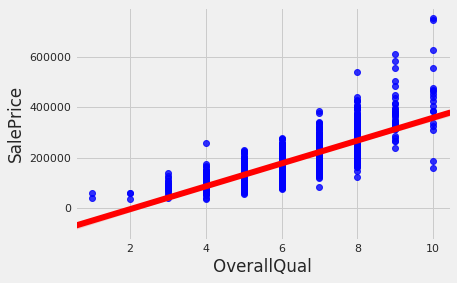

In [0]:
sns.regplot(df['OverallQual'], df['SalePrice'], scatter_kws={"color": "blue"}, line_kws={"color": "red"});

In [0]:
df.corr()['SalePrice']

## 1.2 Now using the X variables that you feel like will be the best predictors of y use statsmodel to run the multiple regression between these variables and Y. You don't need to use every X variable in your dataset, in fact it's probably better if you don't. Just pick ones that you have already cleaned that seem the most relevant to house prices.

In [0]:
import statsmodels.api as sm
from scipy import stats

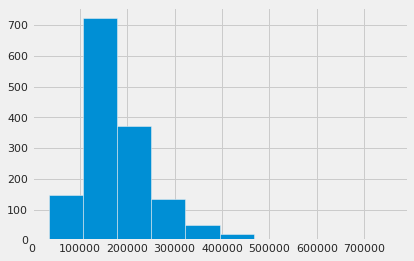

In [0]:
df.SalePrice.hist();

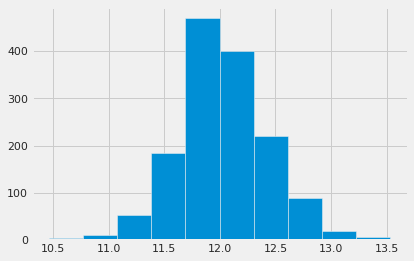

In [0]:
df.Ln_SalePrice.hist();

In [0]:
target = 'SalePrice'
features = ['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 
            'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars']

In [0]:
X = df[features] 
y = df[target]

In [0]:
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     420.6
Date:                Thu, 02 May 2019   Prob (F-statistic):               0.00
Time:                        03:18:58   Log-Likelihood:                -17402.
No. Observations:                1460   AIC:                         3.483e+04
Df Residuals:                    1446   BIC:                         3.491e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.148e+06   1.25e+05     -9.193   

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## 1.3 Identify the standard errors and P-Values of these coefficients in the output table. What is the interpretation of the P-values here?

The standard errors are in the column labeled 'std err'. The P-Values are labeled 'P>|t|'

## 1.4 Remove outliers from your dataset and run the regression again. Do you see a change in some coefficients? Which seem to move the most?

In [0]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')
df = df.drop(columns=['Id'])
df['Ln_SalePrice'] = np.log(df['SalePrice'])
df.LotFrontage = df.LotFrontage.fillna(np.mean(df.LotFrontage))
df.MasVnrArea  = df.MasVnrArea.fillna(np.mean(df.MasVnrArea))
df.GarageYrBlt = df.GarageYrBlt.fillna(np.mean(df.GarageYrBlt))

In [0]:
features.append('SalePrice')

In [0]:
features.append('Ln_SalePrice')

In [0]:
features

['LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'SalePrice',
 'Ln_SalePrice']

In [0]:
df = df[features]

In [0]:
print(df.shape)
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
print(df.shape)

(1460, 15)
(1363, 15)


In [0]:
y = df.SalePrice

In [0]:
X = df[features[:-2]]

In [0]:
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     581.7
Date:                Thu, 02 May 2019   Prob (F-statistic):               0.00
Time:                        03:19:59   Log-Likelihood:                -15721.
No. Observations:                1363   AIC:                         3.147e+04
Df Residuals:                    1349   BIC:                         3.154e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.277e+06   8.74e+04    -14.605   

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


LonFrontage became statistically significant after removing outliers.

## 1.5 Create a new log(y) variable and use it to run a log-linear regression of your variables using statmodels 

In [0]:
y = df.Ln_SalePrice

In [0]:
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Ln_SalePrice   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     673.8
Date:                Thu, 02 May 2019   Prob (F-statistic):               0.00
Time:                        03:29:03   Log-Likelihood:                 845.41
No. Observations:                1363   AIC:                            -1663.
Df Residuals:                    1349   BIC:                            -1590.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.5293      0.461      5.492   

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## 2.1 Run a test for high levels of collinearity in your dataset. Calculate the Variance Inflation Factor for each X variable. Do you see VIF values greater than ten? If so try omitting those X variables and run your regression again. Do the standard errors change? Do the coefficients change? Do the coefficients seem to have an interpretation that matches your intuition?

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = sm.add_constant(X)
vif = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
pd.Series(vif, X.columns)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const           16898.248972
LotFrontage         1.475671
LotArea             1.508066
OverallQual         2.633639
YearBuilt           2.513062
YearRemodAdd        1.781429
MasVnrArea          1.277854
BsmtFinSF1          1.296060
TotalBsmtSF         3.293425
1stFlrSF            3.174648
GrLivArea           4.447134
FullBath            2.178823
TotRmsAbvGrd        3.207577
GarageCars          1.863070
dtype: float64

All VIFs below 10

## 2.2 Variables that have high levels of multicollinearity should also be highly correlated with each other. Calculate your X matrix's correlation matrix to check if the variables highlighted by the VIF test truly are highly correlated.

In [0]:
df[features[:-2]].corr()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars
LotFrontage,1.000000,0.508153,0.187107,0.119408,0.051560,0.166851,0.106273,0.304471,0.362943,0.294220,0.143010,0.291650,0.278914
LotArea,0.508153,1.000000,0.116248,0.036395,0.002662,0.098012,0.146884,0.269960,0.358622,0.325695,0.129281,0.289728,0.243604
OverallQual,0.187107,0.116248,1.000000,0.591005,0.539777,0.363393,0.155324,0.494218,0.404276,0.552149,0.532587,0.373204,0.571043
YearBuilt,0.119408,0.036395,0.591005,1.000000,0.605131,0.311078,0.227018,0.403027,0.283889,0.219676,0.492878,0.086645,0.538785
YearRemodAdd,0.051560,0.002662,0.539777,0.605131,1.000000,0.146292,0.097867,0.278429,0.218774,0.270762,0.434305,0.160194,0.402458
MasVnrArea,0.166851,0.098012,0.363393,0.311078,0.146292,1.000000,0.206085,0.311898,0.300315,0.307735,0.233986,0.230600,0.328256
BsmtFinSF1,0.106273,0.146884,0.155324,0.227018,0.097867,0.206085,1.000000,0.407902,0.327890,0.051333,0.005116,-0.064791,0.174028
TotalBsmtSF,0.304471,0.269960,0.494218,0.403027,0.278429,0.311898,0.407902,1.000000,0.785450,0.330565,0.286600,0.198819,0.417762
1stFlrSF,0.362943,0.358622,0.404276,0.283889,0.218774,0.300315,0.327890,0.785450,1.000000,0.457998,0.339924,0.332188,0.414926
GrLivArea,0.294220,0.325695,0.552149,0.219676,0.270762,0.307735,0.051333,0.330565,0.457998,1.000000,0.611996,0.812623,0.445022


## 2.3 If you have variables with high Variance Inflation Factors, try excluding them from your regression. Do your standard errors improve? (get smaller). If high levels of multicollinearity are removed, the precision of the dataset should increase.

In [0]:
# All my features have VIF < 10

## 2.4 Recalculate your regression using Robust Standard Errors? What happens to your standard errors?

In [0]:
model = sm.OLS(y, sm.add_constant(X))
results = model.fit(cov_type='HC3')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Ln_SalePrice   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     658.9
Date:                Thu, 02 May 2019   Prob (F-statistic):               0.00
Time:                        03:29:39   Log-Likelihood:                 845.41
No. Observations:                1363   AIC:                            -1663.
Df Residuals:                    1349   BIC:                            -1590.
Df Model:                          13                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.5293      0.547      4.620   

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Standard errors didn't change by much.

## 2.5 Use scatterplots or Seaborn's pairplot functionality to perform an eyeball test for potential variables that would be candidates for generating polynomial regressors. 

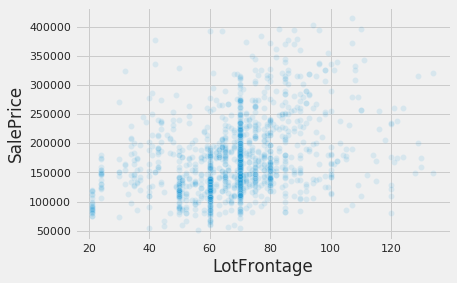

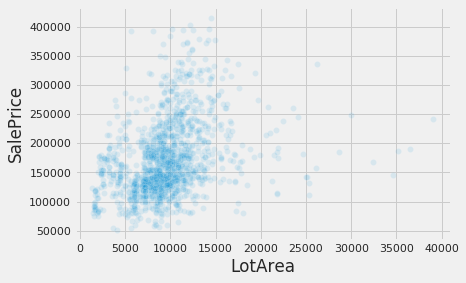

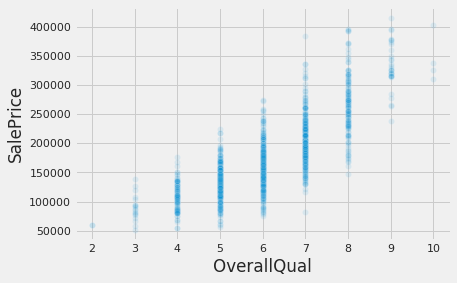

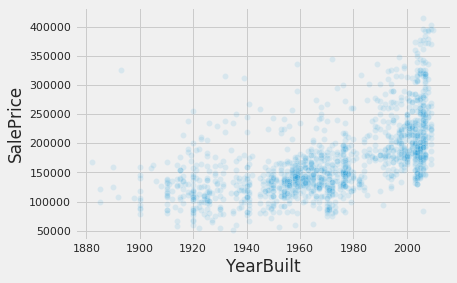

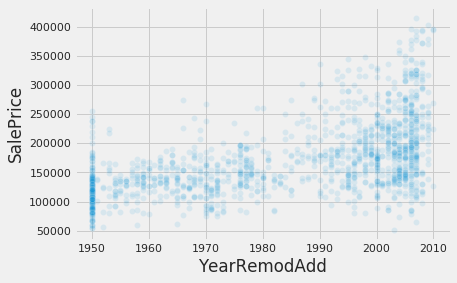

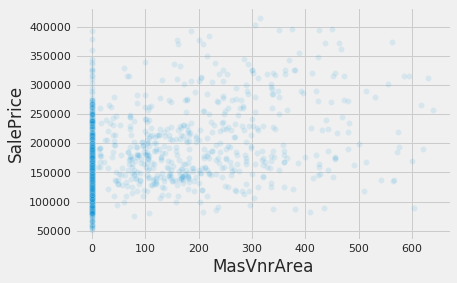

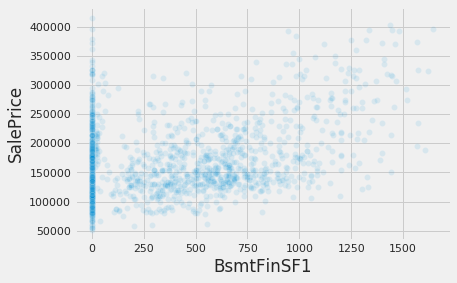

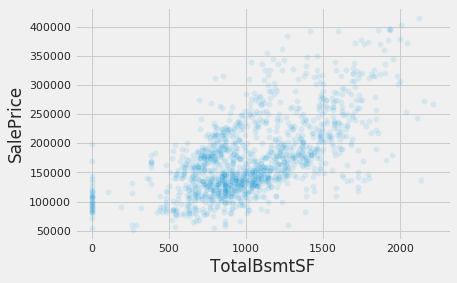

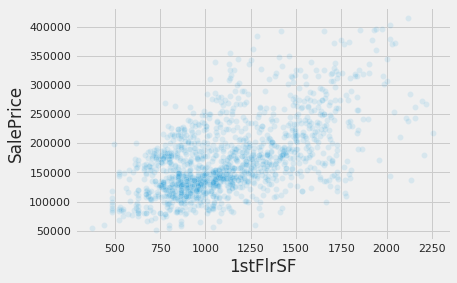

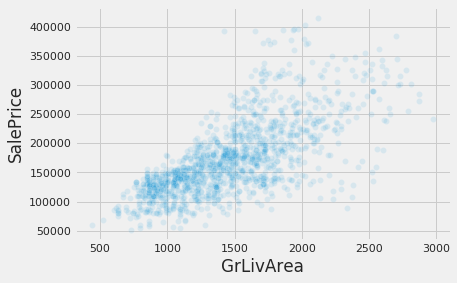

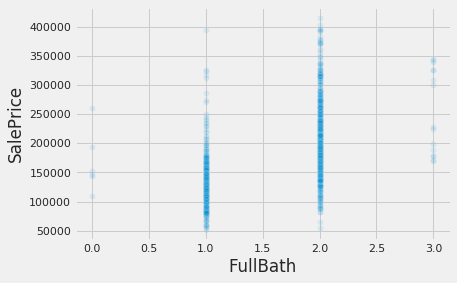

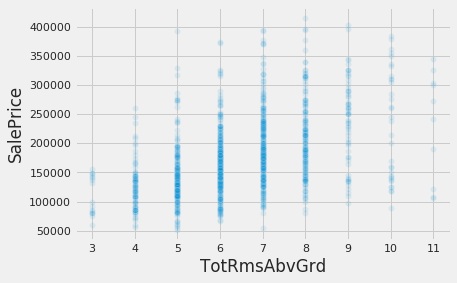

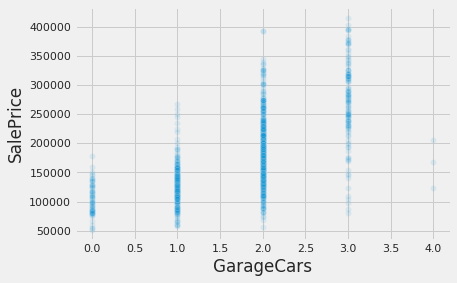

In [0]:
for feature in features[:-2]:
    sns.scatterplot(x=feature, y=target, data=df, alpha=0.1)
    plt.show()

## 2.6 Use seaborn's residplot to plot the distribution of each x variable's residuals. Does these plots indicate any other features that would be potential candidates for polynomial features.

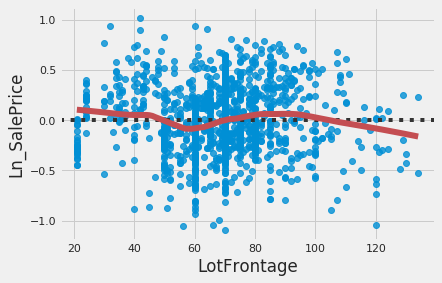

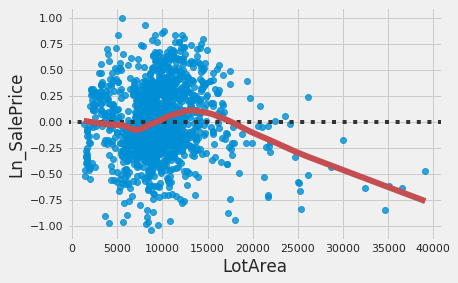

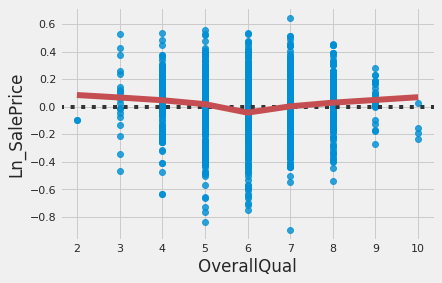

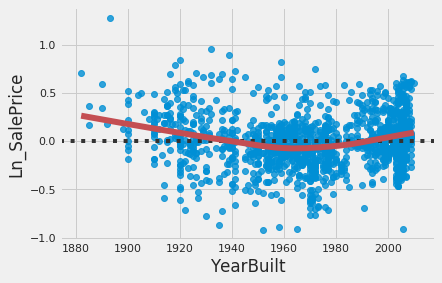

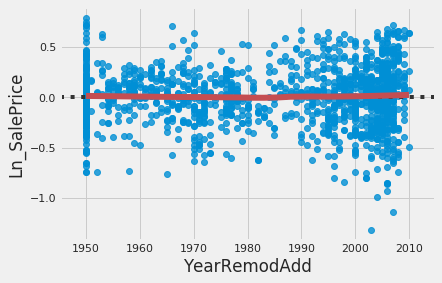

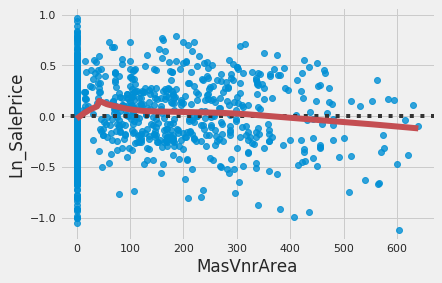

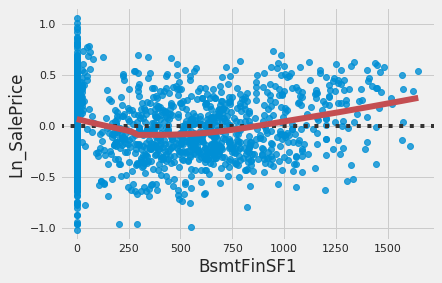

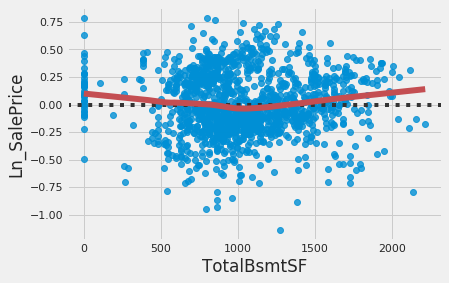

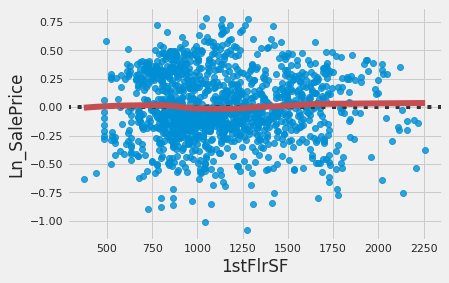

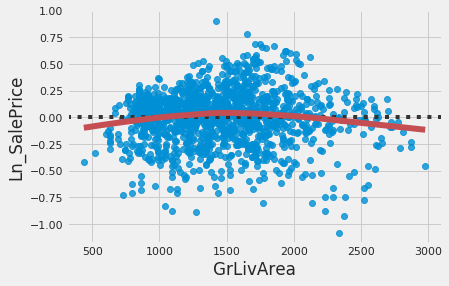

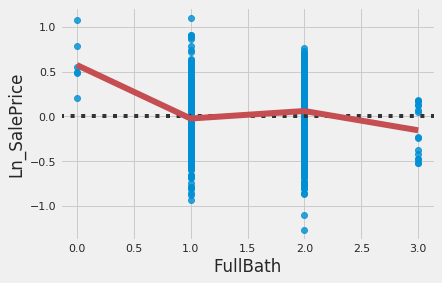

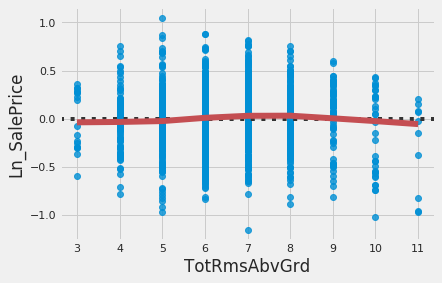

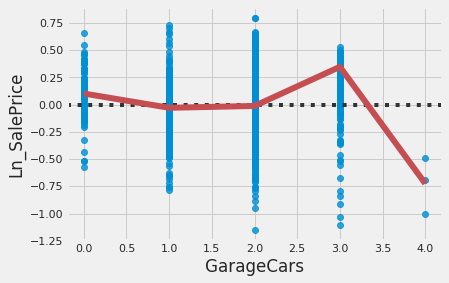

In [0]:
for feature in features[:-2]:
    sns.residplot(X[feature], y, lowess=True, line_kws=dict(color='r'))
    plt.show()

## 2.6 Feature Engineer the appropriate polynomial features from your analysis above and include them in one final log-polynomial, robust standard error, regression. Do the coefficients of this most advanced regression match your intuition better than the coefficients of the very first regression that we ran with the Statmodels library?

In [0]:
X.shape, y.shape

((1363, 14), (1363,))

In [0]:
X['YearBuilt_squared'] = X['YearBuilt']**2
X['LotArea_squared'] = X['LotArea']**2
X['BsmtFinSF1_squared'] = X['BsmtFinSF1']**2

In [0]:
X.head(2)

,const,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,YearBuilt_squared,LotArea_squared,BsmtFinSF1_squared
0,1.0,65.0,8450,7,2003,2003,196.0,706,856,856,1710,2,8,2,4012009,71402500,498436
1,1.0,80.0,9600,6,1976,1976,0.0,978,1262,1262,1262,2,6,2,3904576,92160000,956484


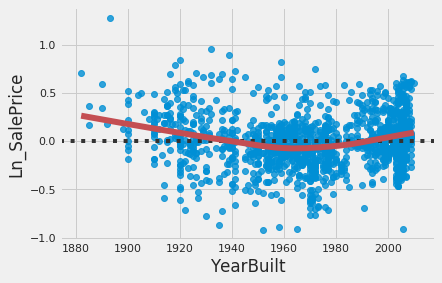

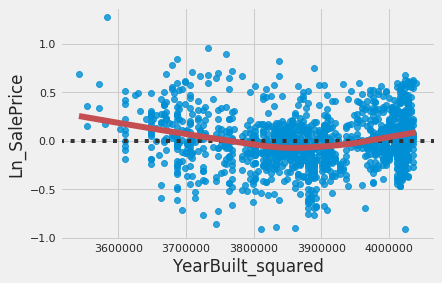

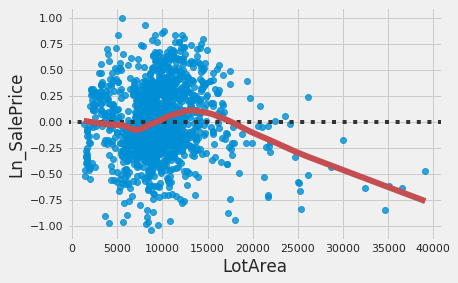

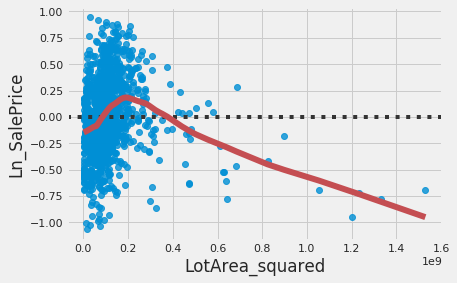

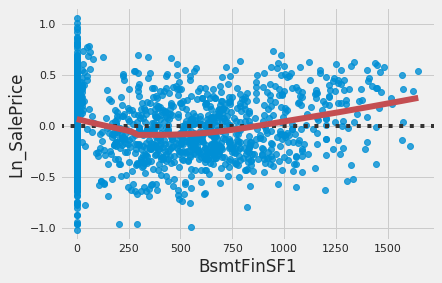

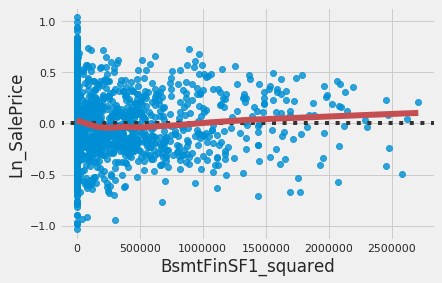

In [0]:
for feature in ['YearBuilt' , 'YearBuilt_squared', 'LotArea', 'LotArea_squared', 'BsmtFinSF1', 'BsmtFinSF1_squared']:
    sns.residplot(X[feature], y, lowess=True, line_kws=dict(color='r'))
    plt.show()

In [0]:
X = X.drop(['YearBuilt_squared', 'LotArea_squared', 'BsmtFinSF1'], axis=1)

In [0]:
X.columns

Index(['const', 'LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'BsmtFinSF1_squared'],
      dtype='object')

In [0]:
model = sm.OLS(y, sm.add_constant(X))
results = model.fit(cov_type='HC3')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Ln_SalePrice   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     651.3
Date:                Thu, 02 May 2019   Prob (F-statistic):               0.00
Time:                        03:54:34   Log-Likelihood:                 825.55
No. Observations:                1363   AIC:                            -1623.
Df Residuals:                    1349   BIC:                            -1550.
Df Model:                          13                                         
Covariance Type:                  HC3                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.4252      0

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# Stretch Goals

- Research the assumptions that are required for OLS to be BLUE the "Best Linear Unbiased Estimator". You might try searching and trying to understand the conditions of what's called the Gauss-Markov Theorem.
- Research other diagnostic tests. Can you show that residuals are normally distributed graphically?
- Write a blog post about inferential modeling using linear regression.